<a href="https://colab.research.google.com/github/Eduflores1497/Examen-Parcial/blob/main/ExamenProblema16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

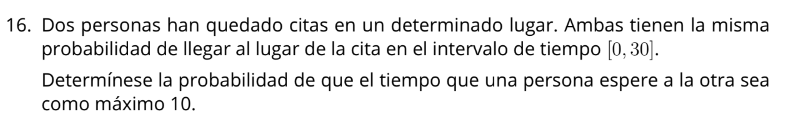

# **1,2,3.Identifique las variables aleatorias, su distribución de probabilidad y modele las variables aleatorias**

En el planteamiento del problema nos dice que ambas personas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0,30]. Por lo que:

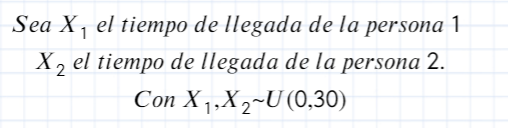

# **4. Defina el modelo del sistema y los objetivos de la simulación**
El modelo se define como $|X_1-X_2|\leq10$, ya que, eso nos indica que los tiempos de llegada no tengan una diferencia mayor a 10 minutos sin importar cual de los dos llegue primero.

Si $Z=|X_1-X_2|\leq10$, entonces los citados habrán llegado con no más de 10 minutos de diferencia. Cabe recordar que $X_1$ representa el tiempo de llegada de la persona 1 y $X_2$ el tiempo de llegada de la persona 2. Ambas con distribuciones uniformes (0,30).

Así el objetivo es **determinar $P(Z=|X_1-X_2|\leq10)$.**

Una forma de simular este modelo es el siguiente:

In [4]:
import numpy as np
import random as rand
import math as mat
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
def llegadas(): #Función que simula una llegada de los citados y nos regresa el número de casos favorables
  favorables=0  #Contador de casos favorables en la simulación
  x1=rand.uniform(0,30) #Tiempo de llegada de la primera persona con distribución uniforme (0,30)
  x2=rand.uniform(0,30) #Tiempo de llegada de la segunda persona con distribución uniforme (0,30)
  z=abs(x1-x2)  #Modelando la variable z=|x1-x2|
  if z<=10: #Criterio para considerar a un caso como favorable
    favorables=favorables+1 #Aumento en el contador de casos favorables siempre que se cumpla el criterio anterior
  return favorables

In [6]:
llegadas()  #Simulamos la primera llegada de los citados.

1

# **5.Diseñe el experimento**
Para calcular que las llegadas de los citados al lugar tengan como máximo 10 minutos de diferencia $P(Z<=10)$ simulamos n veces el evento para ir contando los casos favorables y dividirlo entre los casos totales, así calculamos la probabilidad buscada de forma acumulativa. Tomando en cuenta que siempre que ocurre $|X_1-X_2|\leq10$, se toma como un caso favorable.

In [7]:
def simulaciones(n):#Función que simula n veces un evento y nos regresa la probabilidad de ese evento
  prob=[]#Lista para guardar las probabilidades
  casosFavorables=0 #Contador de casos favorables en las n simulaciones
  for i in range (n):#Ejercemos nuestro ciclo de tamaño n
    casosFavorables=casosFavorables+llegadas() #Llamamos a la función que simula un evento en cada iteración y guardamos el resultado en nuestro contador de casos favorables
    prob.append(casosFavorables/(i+1)) #guardamos la probabilidad por cada iteracion de los casos favorables al final de la lista
  return prob #Nuestra lista con las probabilidades calculadas en las n iteraciones

In [12]:
probZ=simulaciones(2000) #Mandamos a ejecutar nuestra función y lo guardamos en una lista x

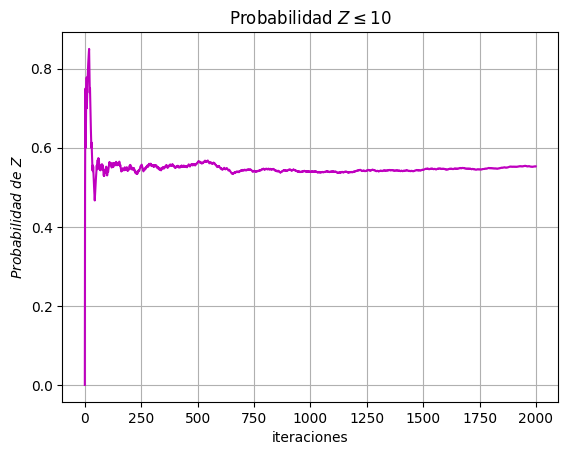

In [25]:
plt.plot(probZ,'m')
plt.xlabel('iteraciones')
plt.ylabel('$Probabilidad$ $de$ $Z$')
plt.title('Probabilidad $Z\leq10$')
plt.grid(True)
plt.show()

In [14]:
print('La media es:',np.mean(probZ),'y la desviación estandar es:', np.std(probZ))

La media es: 0.5486852639200299 y la desviación estandar es: 0.02804631024142445


# **6.Calcular N y repetir el experimento N veces**

Calculamos N para saber el número de muestras que necesitamos.\

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [15]:
n= (2*np.std(probZ)*1.96/0.01)**2 #Calculo de N
print(n)
N=mat.ceil(n)#Redondeamos N al entero de arriba

120.87141370226624


In [16]:
def modelo(n):
    medias_muestrales=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulaciones(2000) #Mandamos a llamar a nuestra función con 2000 iteraciones
        medias_muestrales.append(np.mean(s))  #Calculamos la media por cada vez que se ejecutan 2000 simulaciones
    return medias_muestrales  #Lista de tamaño N con las medias muestrales, donde cada muestra son 2000 simulaciones

In [17]:
medias= modelo(N)

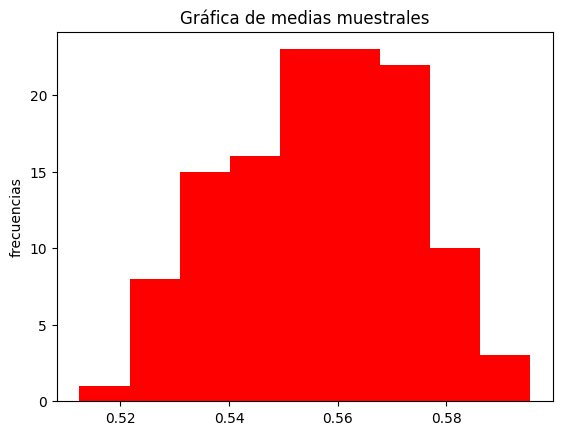

In [37]:
plt.hist(medias, color='r', bins=9)
plt.ylabel('frecuencias')
plt.title('Gráfica de medias muestrales')
plt.show()

# **La probabilidad de que el tiempo de espera de los citados sea menor a 10 min**

In [35]:
print(np.mean(medias), np.std(medias))

0.5565177397126772 0.01658845317190174


## **7.Hallar intervalos de confianza**
\
$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [20]:
np.mean(medias) - 1.96*np.std(medias)/np.sqrt(N), np.mean(medias) + 1.96*np.std(medias)/np.sqrt(N)

(0.5535619789656837, 0.5594735004596706)

#**8. Solución analitica**

Calcular la probabilidad $P(Z=|X_1-X_2|\leq10)$ que es la probabilidad de que una persona llegue antes que la otra por no más de 10 minutos.

Como $X_1$ y $X_2$ son dos variables uniformes(0,30), que representan la llegada a la cita de las dos personas de forma independiente, entonces la probabilidad de que la primera persona llegue antes que la segunda persona es 0.5 y la probabilidad de que la segunda persona llegue antes que la primera tambien es 0.5


>$P(Z\leq$$t)=\frac{1}{2}P(X_1-X_2\leq$$t)$$+\frac{1}{2}P(X_1-X_2\leq$$t)$

Vamos a encontrar la distribución de $Z$ integrando la densidad conjunta de $X_1$ y $X_2$ sobre la región en la que $|X_1-X_2|\leq$$t$ , asi:

>$P(Z\leq$$t)=\frac{1}{2}\int_{0}^{30}\int_{0}^{x+t}\frac{1}{30^2}dydx+\frac{1}{2}\int_{0}^{30}\int_{0}^{y+t}\frac{1}{30^2}dxdy$

>$P(Z\leq$$t)=\frac{t(60-t)}{30^2}.$

con $t=10$ min de tolerancia entre llegadas

>$P(Z\leq$$10)=\frac{10(60-10)}{30^2}=\frac{500}{900}=\frac{5}{9}=0.5555555556$

#**9. Comparando el error de la simulacion**


>$\epsilon=\frac{solución~analitica-solución~simulacion}{solucion~analitica}$

Como la solución análitica es $\frac{5}{9}$, entonces:

In [22]:
sa=5/9
ss=np.mean(medias)
error=(sa-ss)/sa
print('El error es',error)

El error es -0.001731931482818827
